# Bank Customer Churn Prediction using ANNs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Loading data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5308,5309,15735439,P'an,449,Spain,Female,31,1,113693.00,1,0,0,82796.29,0
4586,4587,15664895,Onuchukwu,602,France,Female,25,0,0.00,2,1,1,101274.17,0
9800,9801,15640507,Li,762,Spain,Female,35,3,119349.69,3,1,1,47114.18,1
9781,9782,15650424,Bryant,641,France,Female,48,3,147341.43,1,1,1,157458.61,1
2204,2205,15762803,Innes,509,France,Male,31,3,0.00,2,1,0,15360.91,0


In [3]:
df.shape
#So we have 10k customer records and 14 dimensinos

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Run a few describe() calls to explore columns. But more efficient way is using unique(), done in next cell
# df['Exited'].describe() # This is the target column containing churn status
# df['EstimatedSalary'].describe()
# df['CreditScore'].describe()

In [6]:
# Find out nature of values in each column so that we can eliminate unnecessary cols and figure out further preprocessing
for col in df:
    print(f'{col}: {df[col].unique()}') 

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 7

Above results show us that there are a few columns that can be removed. There are a few categorical columns that will need to be encoded for subsequent analysis.

In [7]:
# Drop columns that wont be used for analysis
df1= df.drop(['RowNumber','CustomerId','Surname'],axis=1)


In [8]:
df1.shape
# We have 10k customer records and 11 dimensions. Will drop Exited column later as its target column
# So in the end there will be 10 useful dimensions

(10000, 11)

We have to check for null/NaN values and take steps if they are found.

In [9]:
# Check for null values in each column
null_columns = df1.columns[df1.isnull().any()]
null_columns

# If there are null values, print out the column names
if null_columns.empty:
    print("No null values in any column.")
else:
    print("Null values found in the following columns:")
    print(null_columns.tolist())

No null values in any column.


No null values, so preprocessing to tackle them is not necessary.

### Data viz to explore churn patterns

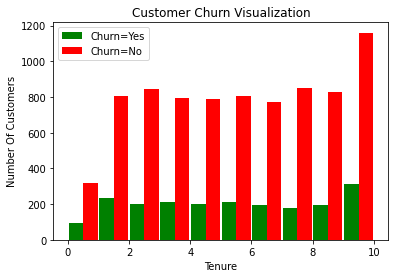

In [10]:
tenure_churn_no = df1[df1.Exited==0].Tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualization")

# Plot histogram of customer churn as a function of the tenure (i.e. no of years they have been a customer of the bank)
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

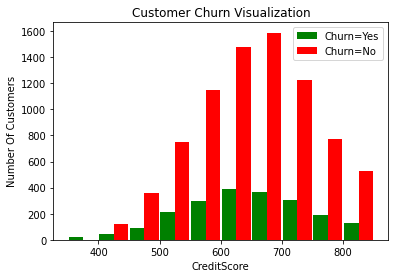

In [11]:
CreditScore_no = df1[df1.Exited==0].CreditScore      
CreditScore_yes = df1[df1.Exited==1].CreditScore      


plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualization")

# Plot histogram of customer churn as a function of the customer credit scores
plt.hist([CreditScore_yes, CreditScore_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


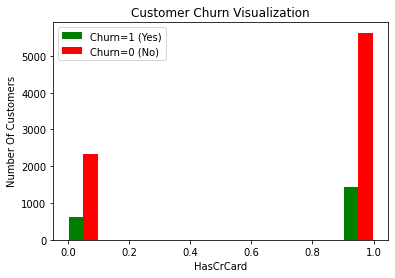

In [12]:
HasCrCard_no = df1[df1.Exited==0].HasCrCard      
HasCrCard_yes = df1[df1.Exited==1].HasCrCard      


plt.xlabel("HasCrCard")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualization")

# Plot histogram of customer churn as a function of the customer credit scores
plt.hist([HasCrCard_yes, HasCrCard_no], rwidth=0.95, color=['green','red'],label=['Churn=1 (Yes)','Churn=0 (No)'])
plt.legend()


### Tackling Categorical Variables

In [13]:
# Identify which cols have categorical values by printing list of unique values in each column
for col in df1:
    print(col,':', df1[col].unique()) 

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

Above result shows us that Geography, Gender, HasCrCard and IsActiveMember are categorical variables.
Exited is also categorical (target variable). We will drop it later.

In [14]:
# Need to replace Female and Male with 0 and 1
# We dont need a new col for this so using inplace=true param will update the existing DF col itself
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)
df1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
6,822,France,0,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
8,501,France,0,44,4,142051.07,2,0,1,74940.50,0
9,684,France,0,27,2,134603.88,1,1,1,71725.73,0


Geography will need one hot encoding as it is not binary and not ordinal.

In [15]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [16]:
df2.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### **Create training and test sets**

Create the training and test datasets. We will perform feature scaling & handle class imbalance after this to prevent data leakage.


In [17]:
# Create train and test datasets

X = df2.drop('Exited',axis='columns')
y = df2['Exited']
# Use stratified sampling for representative distribution of churned and not churned customers as per original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=df2['Exited'])

### Scaling continuous variables


#### Need for scaling
Neural networks work by adjusting the weights and biases of the neurons to minimize the error between the predicted output and the actual output. This process involves calculating gradients and updating the weights using optimization algorithms like gradient descent.

When the input features have different scales or units, it can cause issues during the training process. Features with larger scales can dominate the training process and overshadow the smaller-scaled features. This can lead to slow convergence and inefficient learning.

By scaling the features, we bring all the input values to a similar range, typically between 0 and 1 or -1 and 1. This ensures that no feature dominates over the others and prevents any bias towards a particular feature. It also helps the model generalize well to new, unseen data.

To scale the features, we can use techniques like min-max scaling or standardization (standard scaling). Min-max scaling brings the values within a specific range, while standardization transforms them to have zero mean and unit variance.

#### Perform scaling
We opt for min-max scaling since it will transform each value in the column proportionally within the range [0,1]. 
This is the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

In [18]:
cols_to_scale = ['CreditScore',  'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] # these are the ones with continuous/ordinal values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])


for col in X_train:
    print(col,':', X_train[col].unique()) 


CreditScore : [0.498 0.728 0.866 0.548 0.482 0.68  0.456 0.79  0.772 0.298 0.    0.31
 0.538 0.42  0.382 0.504 0.916 0.762 0.752 0.358 0.396 0.854 0.468 0.7
 0.886 0.458 0.834 0.924 0.584 0.49  0.67  0.32  0.786 0.374 0.664 0.608
 0.678 0.448 0.722 0.294 0.578 0.708 0.982 0.442 0.816 0.75  0.522 0.54
 0.412 0.454 0.748 0.554 0.904 0.76  0.706 0.302 0.436 0.45  0.726 0.648
 0.826 0.626 0.55  0.532 0.27  0.582 0.646 0.862 0.66  0.51  0.574 0.542
 0.43  0.5   0.484 0.37  0.606 0.438 0.796 0.306 0.3   0.794 0.328 0.314
 0.814 0.662 0.6   0.324 0.596 0.568 0.336 0.672 0.934 0.478 0.308 0.394
 0.642 0.588 0.636 0.372 0.17  0.666 0.402 0.824 0.592 0.652 0.848 0.658
 0.724 0.512 0.618 0.912 0.366 0.25  0.604 1.    0.842 0.942 0.502 0.734
 0.676 0.572 0.742 0.704 0.85  0.86  0.288 0.696 0.492 0.702 0.278 0.44
 0.388 0.556 0.778 0.788 0.616 0.452 0.312 0.472 0.622 0.69  0.408 0.732
 0.566 0.418 0.89  0.838 0.528 0.98  0.894 0.73  0.95  0.524 0.586 0.78
 0.612 0.52  0.896 0.428 0.48  0.346 0.818 

### Class imbalance check & address

In [19]:
# Check distribution in target column (training data)
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [20]:
# Find out percentage diff between no. of 0 records and no. of 1 records
print(100*6370/(6370+1630) -100*1630/(6370+1630))

59.25


Downsampling might lead to 59% reduction in amount of data which is a lot. Lets opt for oversampling.

In [21]:
# Checking versions of imblearn and sklearn owing to bug in imblearn. 
# pip show imbalanced-learn 
# pip show scikit-learn

Bug in imblearn addressed by keeping import statement in separate cell and actual usage of oversampling class in separate cell.

In [24]:
from imblearn.over_sampling import ADASYN

In [25]:
# ADASYN (Adaptive Synthetic algorithm) oversampling

print('Before')
print(y_train.value_counts())

# Oversampling the training dataset only to prevent data leakage
ada= ADASYN (random_state=130)
X_train_ada, y_train_ada= ada.fit_resample(X_train, y_train)

print('After')
print(y_train_ada.value_counts())

Before
0    6370
1    1630
Name: Exited, dtype: int64


After
1    6863
0    6370
Name: Exited, dtype: int64


In [26]:
print(X_train_ada.columns)
print(len(X_train_ada.columns)) # No. of columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')
12


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
# SMOTE oversampling

print('Before')
print(y_train.value_counts())

# Oversampling the training dataset only to prevent data leakage
smt= SMOTE (random_state=130)
X_train_smt, y_train_smt= smt.fit_resample(X_train, y_train)

print('After')
print(y_train_smt.value_counts())

Before
0    6370
1    1630
Name: Exited, dtype: int64
After
0    6370
1    6370
Name: Exited, dtype: int64


In [29]:
print(X_train_smt.shape)
print(y_train_smt.shape)

(12740, 12)
(12740,)


### Build a model (ANN) in tensorflow/keras

In [30]:
import tensorflow as tf
from tensorflow import keras



In [31]:
'''
#Trying out hyperparam variants
model = keras.Sequential([
    #relu activation function for hidden layer because the value is easy to compute
    keras.layers.Dense(20, input_shape=(12,), activation='relu'), # 12 neurons since there are 12 input variables
    
    keras.layers.Dense(8, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])
# Work with 50 epochs since not much change between 50 and 100
# 76% accuracy with learning rate=0.001 (default). Lets change to 0.01 and see if it improves.
# Didnt change much. Lets try Nadam optimizer instead of Adam.

opt = keras.optimizers.Adam(learning_rate=0.01)
#opt = keras.optimizers.Nadam(learning_rate=0.01)

model.compile(optimizer=opt,
 #optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Start with epochs=5, accuracy improves from 60% to 72%, but more epochs improve it further.
# Accuracy of 80% reached at 50 epochs, does not go beyond 80 even at 100 epochs.
model.fit(X_train_ada, y_train_ada, epochs=100)
'''

"\n#Trying out hyperparam variants\nmodel = keras.Sequential([\n    #relu activation function for hidden layer because the value is easy to compute\n    keras.layers.Dense(20, input_shape=(12,), activation='relu'), # 12 neurons since there are 12 input variables\n    \n    keras.layers.Dense(8, activation='relu'),\n    \n    keras.layers.Dense(1, activation='sigmoid')\n])\n# Work with 50 epochs since not much change between 50 and 100\n# 76% accuracy with learning rate=0.001 (default). Lets change to 0.01 and see if it improves.\n# Didnt change much. Lets try Nadam optimizer instead of Adam.\n\nopt = keras.optimizers.Adam(learning_rate=0.01)\n#opt = keras.optimizers.Nadam(learning_rate=0.01)\n\nmodel.compile(optimizer=opt,\n #optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n# Start with epochs=5, accuracy improves from 60% to 72%, but more epochs improve it further.\n# Accuracy of 80% reached at 50 epochs, does not go beyond 80 even at 

In [32]:
'''
# Using ADA
# Accuracy of 80% reached with:

model = keras.Sequential()
model.add(keras.layers.Dense(20, input_dim=12, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
# model.add(keras.layers.Dropout(0.5)) # Attempting dropout regularization 
model.add(keras.layers.Dense(1, activation='sigmoid'))

# opt = keras.optimizers.SGD(learning_rate=0.01)
opt = keras.optimizers.Adam(learning_rate=0.001)
# opt = keras.optimizers.Nadam(learning_rate=0.01)

model.compile(optimizer=opt,
 #optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_ada, y_train_ada, epochs=100)
'''

"\n# Using ADA\n# Accuracy of 80% reached with:\n\nmodel = keras.Sequential()\nmodel.add(keras.layers.Dense(20, input_dim=12, activation='relu'))\nmodel.add(keras.layers.Dense(12, activation='relu'))\nmodel.add(keras.layers.Dense(20, activation='relu'))\n# model.add(keras.layers.Dropout(0.5)) # Attempting dropout regularization \nmodel.add(keras.layers.Dense(1, activation='sigmoid'))\n\n# opt = keras.optimizers.SGD(learning_rate=0.01)\nopt = keras.optimizers.Adam(learning_rate=0.001)\n# opt = keras.optimizers.Nadam(learning_rate=0.01)\n\nmodel.compile(optimizer=opt,\n #optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\nmodel.fit(X_train_ada, y_train_ada, epochs=100)\n"

In [ ]:
'''
# Using SMOTE hyperparameter tuning attempts
# Loss is much lower compared to ADASYN
# Accuracy of 82% reached with:

model = keras.Sequential()
model.add(keras.layers.Dense(20, input_dim=12, activation='relu')) # We can use just 12 as no. of neurons but 20 is >12 and can be helpful to increase acc
model.add(keras.layers.Dense(20, activation='relu')) 
model.add(keras.layers.Dense(20, activation='relu')) # attempting 20 instead of 12 neurons in 2nd layer, still 82%
#attempting only 2 hidden layers to see if test acc improves
# model.add(keras.layers.Dense(20, activation='relu')) # One more layer because why not
# model.add(keras.layers.Dense(20, activation='relu')) # One more layer because why not. Trying 4th layer to see if acc exceeds 83.9. Yes!! 84.77% but might be overfitting. lets check test set acc.
# model.add(keras.layers.Dropout(0.5)) # Dropout regularization led to 1% drop in accuracy so better to skip
model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layer

# opt = keras.optimizers.SGD(learning_rate=0.01) #80% acc
# opt = keras.optimizers.Nadam(learning_rate=0.01) #82% acc
# opt = keras.optimizers.Adam(learning_rate=0.01) #82% acc
opt = keras.optimizers.Adam(learning_rate=0.001) #attempting 0.001 LR to see if it goes beyond 82. Yes!! 83.9%


model.compile(optimizer='adam',
              #optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_smt, y_train_smt, epochs=100)

'''

In [60]:
# Using SMOTE

model = keras.Sequential()
model.add(keras.layers.Dense(20, input_dim=12, activation='relu')) # We can use just 12 as no. of neurons but 20 is >12 and can be helpful to increase acc
model.add(keras.layers.Dense(20, activation='relu')) # hidden layer 1
model.add(keras.layers.Dense(20, activation='relu')) # hidden layer 2
model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layer

model.compile(optimizer='adam',
              
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_smt, y_train_smt, epochs=100)

Epoch 1/100
399/399 [==============================] - 3s 4ms/step - loss: 0.6296 - accuracy: 0.6385
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5490 - accuracy: 0.7240
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5194 - accuracy: 0.7461
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.7597
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.7670
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.7659
Epoch 7/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4750 - accuracy: 0.7699
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4692 - accuracy: 0.7729
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4656 - accuracy: 0.7760
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4644 - accura

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                260       
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8160


[0.40148842334747314, 0.8159999847412109]

In [63]:
y_predicted=model.predict(X_test)
# type(y_predicted) y_predicted is in form of 2D numpy array
# Printing the first 10 predictions
y_predicted[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.3365037 ],
       [0.1944746 ],
       [0.7337061 ],
       [0.0020992 ],
       [0.00832183],
       [0.06457309],
       [0.34957606],
       [0.73704076],
       [0.05103967],
       [0.97345144]], dtype=float32)

In [64]:
# Because the predictions are based on sigmoid function, values are between 0 and 1.
# But we want them as either 0 or 1 as per our target variable y_test.

y_test[:10]

2239    1
1502    0
2221    1
6593    0
9666    0
4843    0
2266    1
3580    0
9763    0
3130    1
Name: Exited, dtype: int64

So we convert our 2D prediction array into 1D array with 0 or 1 values based on whether the predicted value crosses a threshold of 0.5
If yes, then its 1 (Exited). If no, then its 0 (Not Exited).

In [65]:
final_y_predicted=[]
for item in y_predicted:
    if item > 0.5:
        final_y_predicted.append(1)
    else:
        final_y_predicted.append(0)
final_y_predicted[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

In [66]:
print ('Test y values: ', list(y_test[:10]))
print ('Predicted y: ', final_y_predicted[:10])


Test y values:  [1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
Predicted y:  [0, 0, 1, 0, 0, 0, 0, 1, 0, 1]


In [67]:
from sklearn.metrics import confusion_matrix , classification_report


print(classification_report(y_test,final_y_predicted))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.69      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.82      2000



Text(69.0, 0.5, 'Truth')

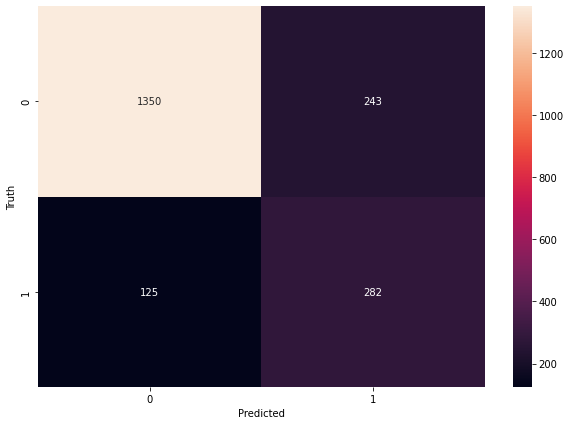

In [68]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=final_y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
acc= (1350+282)/(1350+282+125+243)
print ('Accuracy (%) = ',acc*100)

Accuracy (%) =  81.6


In [75]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, final_y_predicted)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.7702
